In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
path_to_df = r"C:\BC\SP_25\NLP\Discussions\Discussion5\Dataset\emails.csv\emails.csv"
df = pd.read_csv(path_to_df)

# Split the dataset into training, validation, and test sets
train_text, val_test_text, train_labels, val_test_labels = train_test_split(df['text'], df['spam'], test_size=0.3, random_state=42)
val_text, test_text, val_labels, test_labels = train_test_split(val_test_text, val_test_labels, test_size=0.5, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit the vectorizer to the training data and transform both the training and validation/test data
X_train = vectorizer.fit_transform(train_text)
X_val = vectorizer.transform(val_text)
X_test = vectorizer.transform(test_text)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000, class_weight= 'balanced')
model.fit(X_train, train_labels)

LogisticRegression(class_weight='balanced', max_iter=10000)

Validation Accuracy: 0.9919
Test Accuracy: 0.9895
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       633
           1       0.97      1.00      0.98       227

    accuracy                           0.99       860
   macro avg       0.98      0.99      0.99       860
weighted avg       0.99      0.99      0.99       860

Confusion Matrix:
[[625   8]
 [  1 226]]


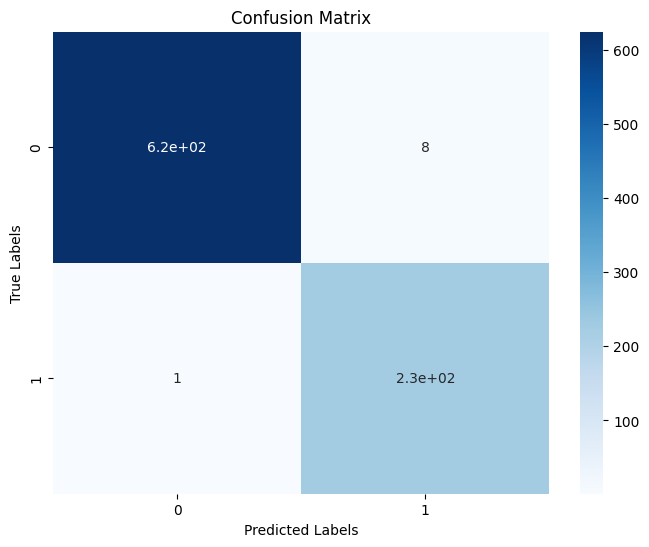

In [6]:
# Make predictions on the validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Evaluate the model on the validation and test sets
val_accuracy = accuracy_score(val_labels, y_pred_val)
test_accuracy = accuracy_score(test_labels, y_pred_test)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print classification report and confusion matrix for the test set
print("Classification Report:")
print(classification_report(test_labels, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred_test))

# Plot a confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_labels, y_pred_test), annot=True, cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()